In [1]:
import numpy as np
import matplotlib.pyplot as plt 

In [2]:
#Define the global constants nested within the alpha, beta, and gamma constants 

def global_constants(mu_m,B_0,m,v_0,k_B,T,mu_bar, L, w_0, R, rho): 
    return {'magnetic_moment':mu_m, 'magnetic_field':B_0, 'mass': m, 'velocity_particle':v_0, 'Boltzmann_constant':k_B, 'Temperature':T, 'number':mu_bar,'Length': L, 'Bulk_flow_speed':w_0, 'Radius':R, 'Density':rho}




params = global_constants(5.49*10**-23,0.1,1,5,1.38*10**-23,2000,3.902*10**-27,10,3000,1e-8,10)

k_B = params['Boltzmann_constant']
T = params['Temperature']
mu_bar = params['number']
mu_m = params['magnetic_moment']
B_0 = params['magnetic_field']
m = params['mass']
v_0 = params['velocity_particle']
L = params['Length']
w_0 = params['Bulk_flow_speed']
R = params['Radius']
rho= params['Density']



#Formula and derivation for damping constant
def c_T(k_B, T, mu_bar): 

    return np.sqrt(2*k_B*T/mu_bar)

c_T_val = c_T(k_B, T, mu_bar)

def damping_constant(c_T_val, R, rho): 
    return (8*np.sqrt(np.pi)/3)*(R**2)*(rho)*c_T_val 
damp = damping_constant(c_T_val, R, rho)




def alpha(mu_m, B_0, m, v_0): 
    return (mu_m * B_0)/(m*v_0**2)

def beta(damp, v_0, L, m):
    return (damp*L)/(2*m*v_0)

def delta(damp, w_0, L, m, v_0): 
    return (damp*w_0* L)/(m*v_0**2)




In [3]:
alpha_val = alpha(mu_m, B_0, m, v_0)
beta_val = beta(damp, v_0, L, m)
delta_val = delta(damp,w_0,L,m,v_0)


print(damp,alpha_val,beta_val,delta_val)

1.7777454466582323e-11 2.1959999999999998e-25 1.7777454466582323e-11 2.133294535989879e-08


Finished with basic RK4


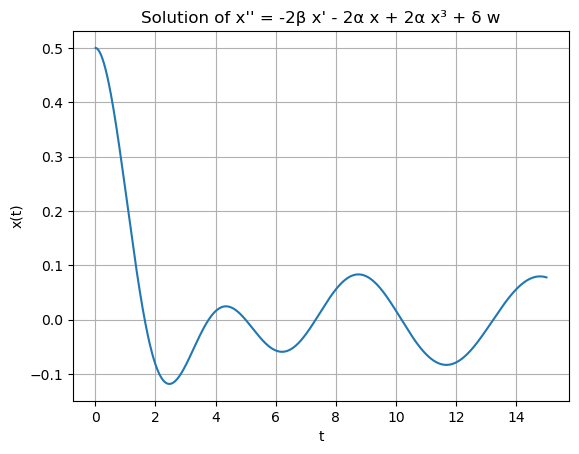

In [23]:
import numpy as np

# ---------------------------------------------------
# Parameters
# ---------------------------------------------------
alpha_val = 1 
beta_val  = 0.4
delta_val = 0.1

def w(t):
    #t = np.linspace(-1,1,10)
    return np.sin(t)   # constant forcing

# ---------------------------------------------------
# Initial conditions
# ---------------------------------------------------
t = 0.0
x = 0.5
v = 0  # your previous variable

dt = 0.01  # FIXED step size (non-adaptive)

# Storage
ts = []
xs = []

# ---------------------------------------------------
# Derivative function
# ---------------------------------------------------
def derivs(t, xv):
    x = xv[0]
    v = xv[1]
    fun = -2*beta_val*v - 2*alpha_val*x + 2*alpha_val*x**3 + 1*delta_val * w(t)
    return np.array([v, fun])

# ---------------------------------------------------
# Basic RK4 Integrator (non-adaptive)
# ---------------------------------------------------
while t < 15.0:

    xv = np.array([x, v])

    k1 = derivs(t, xv)
    k2 = derivs(t + dt/2, xv + dt*k1/2)
    k3 = derivs(t + dt/2, xv + dt*k2/2)
    k4 = derivs(t + dt,   xv + dt*k3)

    # RK4 update step
    xv_new = xv + (dt/6) * (k1 + 2*k2 + 2*k3 + k4)
    x, v = xv_new

    # update time
    t += dt

    ts.append(t)
    xs.append(x)

print("Finished with basic RK4")
plt.plot(ts, xs)
plt.xlabel("t")
plt.ylabel("x(t)")
plt.title("Solution of x'' = -2β x' - 2α x + 2α x³ + δ w")
plt.grid()
plt.show()

/tmp/ipykernel_5538/865674006.py:39: RuntimeWarning: overflow encountered in scalar power
  fun = -2*beta_val*v - 2*alpha_val*x + 2*alpha_val*x**3 + delta_val * w(t)
/tmp/ipykernel_5538/865674006.py:39: RuntimeWarning: invalid value encountered in scalar add
  fun = -2*beta_val*v - 2*alpha_val*x + 2*alpha_val*x**3 + delta_val * w(t)


Finished with basic RK4


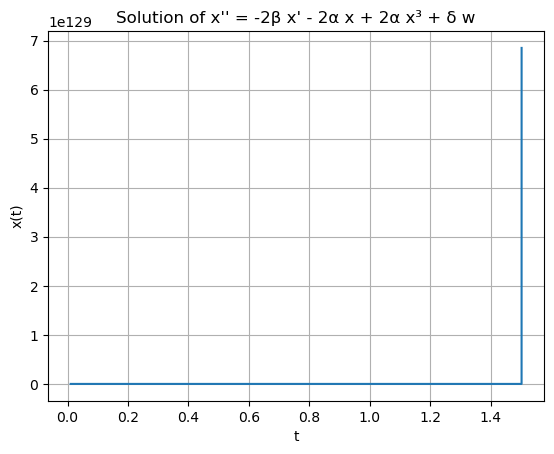

In [6]:
import numpy as np

# ---------------------------------------------------
# Parameters (you must define these values!)
# ---------------------------------------------------

alpha_val = 1 
beta_val  = 0.2 
delta_val = 0.1

# forcing function w(t)
def w(t):
    return 1.0   # constant forcing (you can change this)

# ---------------------------------------------------
# Initial conditions
# ---------------------------------------------------
t  = 0.0
x  = 0.1
v  = 0 # your original line

dt     = 0.01
dt_min = 1e-4
dt_max = 0.2

x_tol  = 1e-3

# storage for plotting
ts = []
xs = []

# ---------------------------------------------------
# Derivative function: returns (dx/dt, dv/dt)
# ---------------------------------------------------
def derivs(t, xv):
    x = xv[0]
    v = xv[1]

    fun = -2*beta_val*v - 2*alpha_val*x + 2*alpha_val*x**3 + delta_val * w(t)
    return np.array([v, fun])


# ---------------------------------------------------
# Adaptive RK4 routine using step-doubling
# ---------------------------------------------------
while t < 15.0:

    xv = np.array([x, v])

    # ---- Full RK4 step (size = dt) ----
    k1 = derivs(t,         xv)
    k2 = derivs(t + dt/2,  xv + dt*k1/2)
    k3 = derivs(t + dt/2,  xv + dt*k2/2)
    k4 = derivs(t + dt,    xv + dt*k3)
    big_step = xv + dt/6*(k1 + 2*k2 + 2*k3 + k4)

    # ---- Two half-steps (size = dt/2 twice) ----
    dt2 = dt/2

    # first half
    k1h = derivs(t,         xv)
    k2h = derivs(t + dt2/2, xv + dt2*k1h/2)
    k3h = derivs(t + dt2/2, xv + dt2*k2h/2)
    k4h = derivs(t + dt2,   xv + dt2*k3h)
    first = xv + dt2/6*(k1h + 2*k2h + 2*k3h + k4h)

    # second half
    k1h = derivs(t + dt2,   first)
    k2h = derivs(t + dt2 + dt2/2, first + dt2*k1h/2)
    k3h = derivs(t + dt2 + dt2/2, first + dt2*k2h/2)
    k4h = derivs(t + dt,    first + dt2*k3h)
    second = first + dt2/6*(k1h + 2*k2h + 2*k3h + k4h)

    # --- Error estimate ---
    err = np.linalg.norm(big_step - second, ord=2)

    # ---------------------------------------------------
    # Step rejection or acceptance
    # ---------------------------------------------------
    if err > x_tol and dt > dt_min:
        # reduce step size
        dt = max(dt/2, dt_min)
        # redo step (skip appending)
        continue
    else:
        # accept step
        x, v = second
        t = t + dt

        ts.append(t)
        xs.append(x)

        # increase st


print("Finished with basic RK4")
plt.plot(ts, xs)
plt.xlabel("t")
plt.ylabel("x(t)")
plt.title("Solution of x'' = -2β x' - 2α x + 2α x³ + δ w")
plt.grid()
plt.show()